
# Step 1. Import libraries




In [0]:
import pandas as pd  

# Step 2. Import dataset

In [0]:
# sklearn (Python's machine learning library) has some popular datasets available
# For this tutorial we import the famous Boston housing dataset
from sklearn.datasets import load_boston

In [0]:
# Let's load the data that we just imported
boston = load_boston()

In [0]:
# So what exactly is in this dataset? Please note: 'target' means the same as 'label'
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


# Step 3. Data exploration

In [0]:
# And explore the shape
# Looks like we have 506 rows and 13 columns
print(boston.data.shape)

(506, 13)


In [0]:
# Now let's look at the first few rows
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
print(bos.head(5))

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


Usually we would do more data exploration now but we skip it for now to save time

# Step 4. Create the model

Now we predict the median value of a house using the other features.



In [0]:
X = boston.data  # features from the scikit-learn dataset
Y = boston.target  # target from the scikit-learn dataset

In [0]:
# Now we create the train and test set
# We fit the model on the train set
# Then we can test it using the test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33,
                                                    random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [0]:
# Now we build the actual linear regression model
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Fit the model
reg = LinearRegression().fit(X_train, Y_train)

In [0]:
preds = reg.predict(X_test)

In [0]:
# Evaluate the model
# Let's have a quick look
print(preds)
print(Y_test)

[37.46723562 31.39154701 27.1201962   6.46843347 33.62966737  5.67067989
 27.03946671 29.92704748 26.35661334 22.45246021 32.20504441 21.78641653
 23.41138441 33.60894362 28.28619511 15.13859055  0.30087325 18.71850376
 14.4706712  11.10823598  2.69494197 19.21693734 38.41159345 24.36936442
 31.61493439 11.42210397 24.92862188 23.31178043 22.7764079  20.65081211
 16.035198    7.07978633 17.65509209 22.81470561 29.21943405 18.61354566
 28.37701843  8.80516873 41.65140459 34.02910176 20.1868926   3.95600857
 29.69124564 12.18081256 27.19403498 30.63699231 -6.24952457 19.9462404
 21.55123979 13.36478173 20.39068171 19.87353324 23.57656877 13.40141285
 17.66457201 24.77424747 35.31476509 15.48318159 28.50764575 21.72575404
 20.58142839 26.08460856 14.51816968 32.37494056 20.80917392 12.18932524
 19.45551285 25.23390429 21.77302317 21.30227044 20.58222113 26.74635016
 17.53006166 18.7191946  19.03026793 25.76553031 21.8757557  15.70891861
 35.12411848 18.04488652 22.43612549 39.4000555  22.

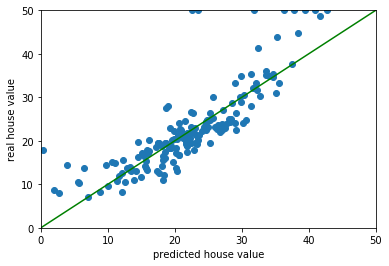

In [0]:
from matplotlib import pyplot as plt # import a plotting library
f, ax = plt.subplots()
ax.scatter(preds, Y_test) # make a scatterplot of predicted and real values
plt.xlabel('predicted house value')
plt.ylabel('real house value')
plt.xlim([0,50])
plt.ylim([0,50])
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'green') # adding the diagonal
plt.show()

In [0]:
# Evaluation metrics --> next time
# But here's a quick preview
from sklearn.metrics import mean_squared_error

print(mean_squared_error(preds, Y_test))

28.5304587659747
